# Capstone Project: Create a Customer Segmentation Report for Arvato Financial Services. PART 2


**Sebastian Uribe**

December , 2019 

We have found which parts of the population are more likely to be customers of the mail-order company, it's time to build a prediction model.

Each of the rows in the "MAILOUT" data files represents an individual that was targeted for a mailout campaign. Ideally, we should be able to use the demographic information from each individual to decide whether or not it will be worth it to include that person in the campaign.

The "MAILOUT" data has been split into two approximately equal parts, each with almost 43 000 data rows. In this part, you can verify your model with the "TRAIN" partition, which includes a column, "RESPONSE", that states whether or not a person became a customer of the company following the campaign. In the next part, you'll need to create predictions on the "TEST" partition, where the "RESPONSE" column has been withheld.

## Part 0: Get to Know the Data

There are four data files associated with this project:

data can be found in [Kaggle](https://www.kaggle.com/c/udacity-arvato-identify-customers/data)

- `Udacity_MAILOUT_052018_TRAIN.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
- `Udacity_MAILOUT_052018_TEST.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

To make predictions use ("MAILOUT"), for predicting which recipients are most likely to become a customer for the mail-order company.

The "CUSTOMERS" file contains three extra columns ('CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP'), which provide broad information about the customers depicted in the file. The original "MAILOUT" file included one additional column, "RESPONSE", which indicated whether or not each recipient became a customer of the company. For the "TRAIN" subset, this column has been retained, but in the "TEST" subset it has been removed; it is against that withheld column that your final predictions will be assessed in the Kaggle competition.

Otherwise, all of the remaining columns are the same between the three data files. For more information about the columns depicted in the files, you can refer to two Excel spreadsheets provided in the workspace. [One of them](./DIAS Information Levels - Attributes 2017.xlsx) is a top-level list of attributes and descriptions, organized by informational category. [The other](./DIAS Attributes - Values 2017.xlsx) is a detailed mapping of data values for each feature in alphabetical order.


## Evaluation Metrics

**Supervised Stage** : 

Area Under the Receiver Operating Characteristic Curve [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) is a common metric used when predicting the probability  for binary classifiers, since this is the evaluation metric at the [Kaggle - Udacity challengue](https://www.kaggle.com/c/udacity-arvato-identify-customers/overview/evaluation), this will be the metric to evaluated the selected model.

In [1]:
# import libraries here; 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# magic word for producing visualizations in notebook
%matplotlib inline

In [2]:
# Change pandas viewing options
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 10)

## LOAD DATA

In [3]:
mailout_train = pd.read_csv('data/Udacity_MAILOUT_052018_TRAIN.csv', sep=';')

In [4]:
mailout_train.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ANZ_STATISTISCHE_HAUSHALTE,ANZ_TITEL,ARBEIT,BALLRAUM,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_INTL_2015,CJT_GESAMTTYP,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,CJT_TYP_4,CJT_TYP_5,CJT_TYP_6,D19_BANKEN_ANZ_12,D19_BANKEN_ANZ_24,D19_BANKEN_DATUM,D19_BANKEN_DIREKT,D19_BANKEN_GROSS,D19_BANKEN_LOKAL,D19_BANKEN_OFFLINE_DATUM,D19_BANKEN_ONLINE_DATUM,D19_BANKEN_ONLINE_QUOTE_12,D19_BANKEN_REST,D19_BEKLEIDUNG_GEH,D19_BEKLEIDUNG_REST,D19_BILDUNG,D19_BIO_OEKO,D19_BUCH_CD,D19_DIGIT_SERV,D19_DROGERIEARTIKEL,D19_ENERGIE,D19_FREIZEIT,D19_GARTEN,D19_GESAMT_ANZ_12,D19_GESAMT_ANZ_24,D19_GESAMT_DATUM,D19_GESAMT_OFFLINE_DATUM,D19_GESAMT_ONLINE_DATUM,D19_GESAMT_ONLINE_QUOTE_12,D19_HANDWERK,D19_HAUS_DEKO,D19_KINDERARTIKEL,D19_KONSUMTYP,D19_KONSUMTYP_MAX,D19_KOSMETIK,D19_LEBENSMITTEL,D19_LETZTER_KAUF_BRANCHE,D19_LOTTO,D19_NAHRUNGSERGAENZUNG,D19_RATGEBER,D19_REISEN,D19_SAMMELARTIKEL,D19_SCHUHE,D19_SONSTIGE,D19_SOZIALES,D19_TECHNIK,D19_TELKO_ANZ_12,D19_TELKO_ANZ_24,D19_TELKO_DATUM,D19_TELKO_MOBILE,D19_TELKO_OFFLINE_DATUM,D19_TELKO_ONLINE_DATUM,D19_TELKO_ONLINE_QUOTE_12,D19_TELKO_REST,D19_TIERARTIKEL,D19_VERSAND_ANZ_12,D19_VERSAND_ANZ_24,D19_VERSAND_DATUM,D19_VERSAND_OFFLINE_DATUM,D19_VERSAND_ONLINE_DATUM,D19_VERSAND_ONLINE_QUOTE_12,D19_VERSAND_REST,D19_VERSI_ANZ_12,D19_VERSI_ANZ_24,D19_VERSI_DATUM,D19_VERSI_OFFLINE_DATUM,D19_VERSI_ONLINE_DATUM,D19_VERSI_ONLINE_QUOTE_12,D19_VERSICHERUNGEN,D19_VOLLSORTIMENT,D19_WEIN_FEINKOST,DSL_FLAG,EINGEFUEGT_AM,EINGEZOGENAM_HH_JAHR,EWDICHTE,EXTSEL992,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_UNAUFFAELLIGER,FINANZ_VORSORGER,FINANZTYP,FIRMENDICHTE,GEBAEUDETYP,GEBAEUDETYP_RASTER,GEBURTSJAHR,GEMEINDETYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,HH_DELTA_FLAG,HH_EINKOMMEN_SCORE,INNENSTADT,KBA05_ALTER1,KBA05_ALTER2,KBA05_ALTER3,KBA05_ALTER4,KBA05_ANHANG,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_AUTOQUOT,KBA05_BAUMAX,KBA05_CCM1,KBA05_CCM2,KBA05_CCM3,KBA05_CCM4,KBA05_DIESEL,KBA05_FRAU,KBA05_GBZ,KBA05_HERST1,KBA05_HERST2,KBA05_HERST3,KBA05_HERST4,KBA05_HERST5,KBA05_HERSTTEMP,KBA05_KRSAQUOT,KBA05_KRSHERST1,KBA05_KRSHERST2,KBA05_KRSHERST3,KBA05_KRSKLEIN,KBA05_KRSOBER,KBA05_KRSVAN,KBA05_KRSZUL,KBA05_KW1,KBA05_KW2,KBA05_KW3,KBA05_MAXAH,KBA05_MAXBJ,KBA05_MAXHERST,KBA05_MAXSEG,KBA05_MAXVORB,KBA05_MOD1,KBA05_MOD2,KBA05_MOD3,KBA05_MOD4,KBA05_MOD8,KBA05_MODTEMP,KBA05_MOTOR,KBA05_MOTRAD,KBA05_SEG1,KBA05_SEG10,KBA05_SEG2,KBA05_SEG3,KBA05_SEG4,KBA05_SEG5,KBA05_SEG6,KBA05_SEG7,KBA05_SEG8,KBA05_SEG9,KBA05_VORB0,KBA05_VORB1,KBA05_VORB2,KBA05_ZUL1,KBA05_ZUL2,KBA05_ZUL3,KBA05_ZUL4,KBA13_ALTERHALTER_30,KBA13_ALTERHALTER_45,KBA13_ALTERHALTER_60,KBA13_ALTERHALTER_61,KBA13_ANTG1,KBA13_ANTG2,KBA13_ANTG3,KBA13_ANTG4,KBA13_ANZAHL_PKW,KBA13_AUDI,KBA13_AUTOQUOTE,KBA13_BAUMAX,KBA13_BJ_1999,KBA13_BJ_2000,KBA13_BJ_2004,KBA13_BJ_2006,KBA13_BJ_2008,KBA13_BJ_2009,KBA13_BMW,KBA13_CCM_0_1400,KBA13_CCM_1000,KBA13_CCM_1200,KBA13_CCM_1400,KBA13_CCM_1401_2500,KBA13_CCM_1500,KBA13_CCM_1600,KBA13_CCM_1800,KBA13_CCM_2000,KBA13_CCM_2500,KBA13_CCM_2501,KBA13_CCM_3000,KBA13_CCM_3001,KBA13_FAB_ASIEN,KBA13_FAB_SONSTIGE,KBA13_FIAT,KBA13_FORD,KBA13_GBZ,KBA13_HALTER_20,KBA13_HALTER_25,KBA13_HALTER_30,KBA13_HALTER_35,KBA13_HALTER_40,KBA13_HALTER_45,KBA13_HALTER_50,KBA13_HALTER_55,KBA13_HALTER_60,KBA13_HALTER_65,KBA13_HALTER_66,KBA13_HERST_ASIEN,KBA13_HERST_AUDI_VW,KBA13_HERST_BMW_BENZ,KBA13_HERST_EUROPA,KBA13_HERST_FORD_OPEL,KBA13_HERST_SONST,KBA13_HHZ,KBA13_KMH_0_140,KBA13_KMH_110,KBA13_KMH_140,KBA13_KMH_140_210,KBA13_KMH_180,KBA13_KMH_210,KBA13_KMH_211,KBA13_KMH_250,KBA13_KMH_251,KBA13_KRSAQUOT,KBA13_KRSHERST_AUDI_VW,KBA13_KRSHERST_BMW_BENZ,KBA13_KRSHERST_FORD_OPEL,KBA13_KRSSEG_KLEIN,KBA13_KRSSEG_OBER,KBA13_KRSSEG_VAN,KBA13_KRSZUL_NEU,KBA13_KW_0_60,KBA13_KW_110,KBA13_KW_120,KBA13_KW_121,KBA13_KW_30,KBA13_KW_40,KBA13_KW_50,KBA13_KW_60,KBA13_KW_61_120,KBA13_KW_70,KBA13_KW_80,

In [5]:
mailout_train.shape

(42962, 367)

In [6]:
mailout_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42962 entries, 0 to 42961
Columns: 367 entries, LNR to ALTERSKATEGORIE_GROB
dtypes: float64(267), int64(94), object(6)
memory usage: 120.3+ MB


## TARGET

In [7]:
mailout_train['RESPONSE'].value_counts()

0    42430
1      532
Name: RESPONSE, dtype: int64

In [8]:
mailout_train['RESPONSE'].value_counts(normalize=True)

0    0.987617
1    0.012383
Name: RESPONSE, dtype: float64

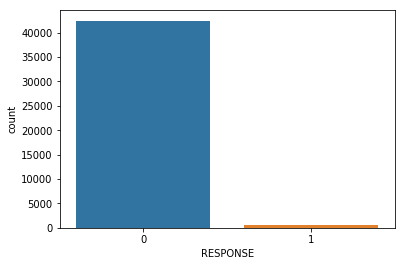

In [9]:
sns.countplot(x='RESPONSE',data=mailout_train);

It is an unbalanced dataset!

As we can recall in the first part, there are a lot of columns with missing data, lest check for that again.

## Features Missing

In [10]:
# utils.py to 
from utils import missing_values_table

In [11]:
mailout_train_missing=missing_values_table(mailout_train)

Dataframe has 367 columns. 
273 has missing values


In [12]:
mailout_train_missing.head(10)

,Missing,% of Total Values
ALTER_KIND4,42921,99.9
ALTER_KIND3,42788,99.6
ALTER_KIND2,42206,98.2
ALTER_KIND1,40974,95.4
KK_KUNDENTYP,25316,58.9
EXTSEL992,15948,37.1
W_KEIT_KIND_HH,9678,22.5
HH_DELTA_FLAG,9678,22.5
KBA05_ZUL1,8648,20.1
KBA05_KRSZUL,8648,20.1


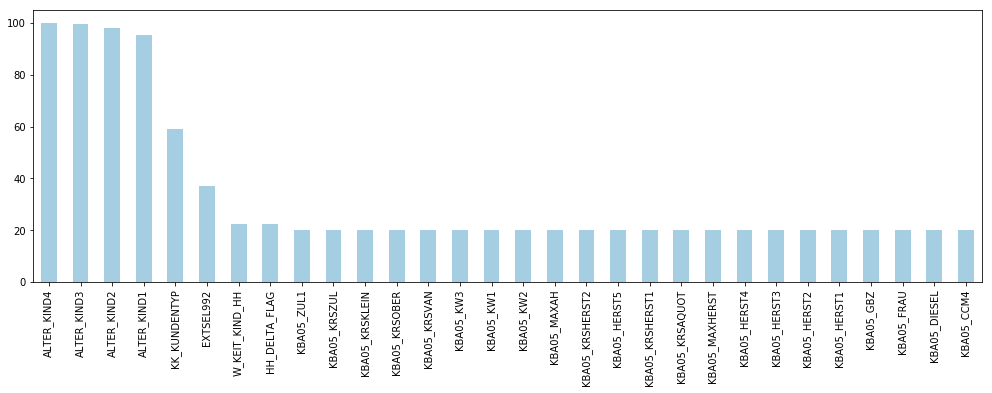

In [13]:
mailout_train_missing['% of Total Values'].head(30).plot(kind ='bar', figsize=(17,5),colormap='Paired')

Its the same kind of dataset as for the first part of the Capstone, so I will apply the same steps to preprocess the data. 

Since there are some features that has 2 possible options when the value is unknown, I created the following function that will replace those value according to the dias_unknown.csv, first It will evaluated if a feature has 2 possible options when the value is unknown and will unified them for the first value that appears in the Value columns,  then it will replace missing values with **NaN**

In [14]:
def replace_NaN_data(dataframe):
    '''
    input  : dataframe
    
    output : dataframe
    
    it replaces every feature with the corresponding value for missing according to the dias_unknown.csv file
    '''
    dias = pd.read_csv('files/dias_unknown.csv',sep=';')
    values_to_replace=dias.set_index('Attribute').to_dict()['Value']
    
    for col in dataframe.columns:
        if col in dias.Attribute.unique():
            if(len(values_to_replace[col].split(','))>1):
                dataframe.loc[dataframe[col]==int(values_to_replace[col].split(',')[1]), col] = int(values_to_replace[col].split(',')[0])
                dataframe.loc[dataframe[col]==int(values_to_replace[col].split(',')[0]), col] = np.nan
            else:
                dataframe.loc[dataframe[col]==int(values_to_replace[col]), col] = np.nan
    
    dataframe['CAMEO_INTL_2015']=dataframe['CAMEO_INTL_2015'].replace('XX',np.nan)
    dataframe['CAMEO_INTL_2015']=dataframe['CAMEO_INTL_2015'].astype('float')

    dataframe['CAMEO_DEUG_2015']=dataframe['CAMEO_DEUG_2015'].replace('X',np.nan)
    dataframe['CAMEO_DEUG_2015']=dataframe['CAMEO_DEUG_2015'].astype('float')
    
    dataframe['CAMEO_DEU_2015']=dataframe['CAMEO_DEU_2015'].replace('X',np.nan)
    dataframe['CAMEO_DEU_2015']=dataframe['CAMEO_DEU_2015'].replace('XX',np.nan)
    
            
    return dataframe

In [15]:
mailout_train = replace_NaN_data(mailout_train)

In [16]:
mailout_train_missing=missing_values_table(mailout_train)

Dataframe has 367 columns. 
334 has missing values


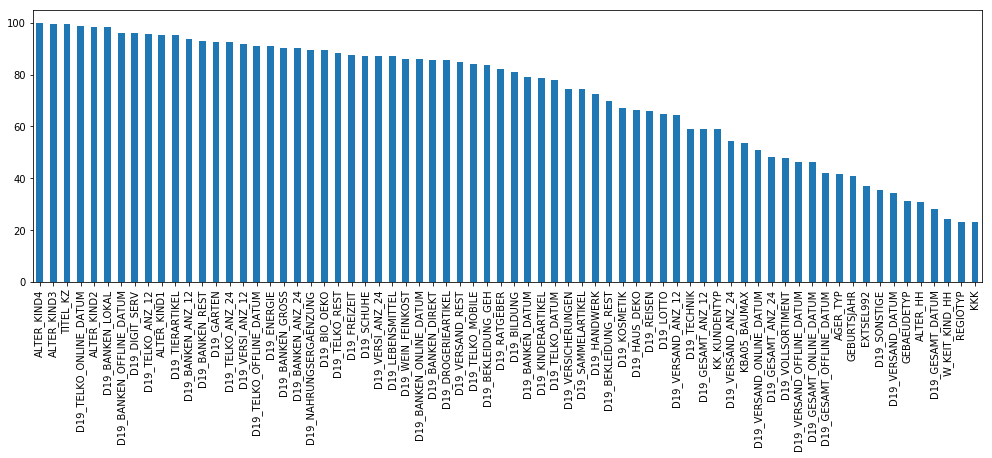

In [17]:
mailout_train_missing['% of Total Values'].head(70).plot(kind ='bar', figsize=(17,5))

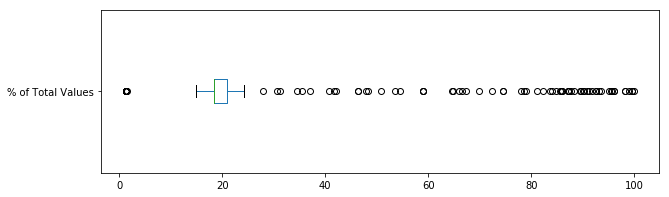

In [18]:
mailout_train_missing['% of Total Values'].plot(kind ='box', figsize=(10,3),vert=False)

 I will set the same  threshold of 30 % to drop any feature with too many missing values

In [19]:
missing_columns_to_drop=mailout_train_missing[mailout_train_missing['% of Total Values']>=30].index
missing_columns_to_drop

Index(['ALTER_KIND4', 'ALTER_KIND3', 'TITEL_KZ', 'D19_TELKO_ONLINE_DATUM',
       'ALTER_KIND2', 'D19_BANKEN_LOKAL', 'D19_BANKEN_OFFLINE_DATUM',
       'D19_DIGIT_SERV', 'D19_TELKO_ANZ_12', 'ALTER_KIND1', 'D19_TIERARTIKEL',
       'D19_BANKEN_ANZ_12', 'D19_BANKEN_REST', 'D19_GARTEN',
       'D19_TELKO_ANZ_24', 'D19_VERSI_ANZ_12', 'D19_TELKO_OFFLINE_DATUM',
       'D19_ENERGIE', 'D19_BANKEN_GROSS', 'D19_BANKEN_ANZ_24',
       'D19_NAHRUNGSERGAENZUNG', 'D19_BIO_OEKO', 'D19_TELKO_REST',
       'D19_FREIZEIT', 'D19_SCHUHE', 'D19_VERSI_ANZ_24', 'D19_LEBENSMITTEL',
       'D19_WEIN_FEINKOST', 'D19_BANKEN_ONLINE_DATUM', 'D19_BANKEN_DIREKT',
       'D19_DROGERIEARTIKEL', 'D19_VERSAND_REST', 'D19_TELKO_MOBILE',
       'D19_BEKLEIDUNG_GEH', 'D19_RATGEBER', 'D19_BILDUNG', 'D19_BANKEN_DATUM',
       'D19_KINDERARTIKEL', 'D19_TELKO_DATUM', 'D19_VERSICHERUNGEN',
       'D19_SAMMELARTIKEL', 'D19_HANDWERK', 'D19_BEKLEIDUNG_REST',
       'D19_KOSMETIK', 'D19_HAUS_DEKO', 'D19_REISEN', 'D19_LOTTO',
     

In [20]:
# drop columns with missing data
mailout_train.drop(missing_columns_to_drop,axis=1,inplace=True)

In [21]:
azdias_missing_2=missing_values_table(mailout_train)

Dataframe has 301 columns. 
268 has missing values


## Rows with Missing data

Lets Check percentage of missing values pair row

In [22]:
clients_missing_data=(mailout_train.isnull().sum(axis=1)*100)/mailout_train.shape[1]

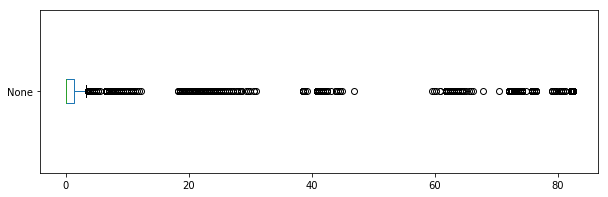

In [23]:
clients_missing_data.plot(kind='box', figsize=(10,3),vert=False);

There are a lot of clients that are missing a lot of information, but keep in mind that we just have a few of the RESPONSE = 1, we must try to keep them. 

An strategy to deal with the rest of features with **NaN**  can be by imputation with median or most frequent value. 

After a few trials. I decided to drop any row with any missing value to keep data as pure as it is. Imputating too much rows can lead to overfitting

In [24]:
mailout_train.shape

(42962, 301)

In [25]:
mailout_train['RESPONSE'].value_counts()

0    42430
1      532
Name: RESPONSE, dtype: int64

In [26]:
mailout_train_1=mailout_train[mailout_train['RESPONSE']==1]#.dropna()

In [27]:
mailout_train_2 = mailout_train[mailout_train['RESPONSE']==0].dropna()

In [28]:
train = pd.concat([mailout_train_1, mailout_train_2])

In [29]:
train.shape

(24518, 301)

In [30]:
train['RESPONSE'].value_counts()

0    24206
1      312
Name: RESPONSE, dtype: int64

## Cleaning and Preprocessing

 I create a file name *data_types.csv* manually, checking each feature with the DIALES Files to determine if a columns was numeric, categorical , or datetime. I add a column to express if the categorical feature can be represented in an ordinal way or needs to be represented in one hot encoding. Aditionaly I created an Anotations columns where I wrote some notes regarding to the preprocess. Maybe this can be enconde in python Rules but, it is safer to check every column manually one by one. 

In [31]:
data_types = pd.read_csv('files/data_types.csv',sep=',')

In [32]:
columns_numeric = data_types[data_types.Feature_Type=='Numeric ']['Attribute'].tolist()
columns_categorical = data_types[data_types.Feature_Type=='Category']['Attribute'].tolist()

In [33]:
def impute_NaN(dataframe):
    '''
    input   :dataframe
    
    output  :dataframe 
    
    it fill any missing values with corresponding median or mode. 
    '''
    dataframe.replace({'LP_STATUS_GROB' :  { 2 : 1,4 : 3,5 : 3,
                                             7 : 6, 9 : 8,}}, inplace =True)
    values_numeric = {}
    for col in columns_numeric:
        if col in dataframe.columns:
            values_numeric[col] = dataframe[col].median()
        
    values_mode = {}
    for col in columns_categorical:
        if col in dataframe.columns:
            values_mode[col] = dataframe[col].mode()[0]
        
    dataframe.fillna(value=values_numeric,inplace=True)
    dataframe.fillna(value=values_mode,inplace=True)
    return dataframe

In [34]:
def mix_features(dataframe):
    '''
    input : dataframe
    
    output: dataframe with mixed features 
    
    Create mixed features based on the mixed_feautres.xlsx file
    '''
    mixed = pd.read_excel('files/mixed_features.xlsx')
    PRAEGENDE_JUGENDJAHRE=mixed[mixed['Attribute']=='PRAEGENDE_JUGENDJAHRE']
    CAMEO_INTL_2015=mixed[mixed['Attribute']=='CAMEO_INTL_2015']
    PRAEGENDE_JUGENDJAHRE['GENERATION_DECADE']=PRAEGENDE_JUGENDJAHRE['Meaning'].apply(lambda x:x.split('-')[0])
    PRAEGENDE_JUGENDJAHRE['Type']=PRAEGENDE_JUGENDJAHRE['Meaning'].apply(lambda x:x.split('-')[1].split('(')[0].split('(')[0])
    PRAEGENDE_JUGENDJAHRE['MOVEMENT']=PRAEGENDE_JUGENDJAHRE['Meaning'].str.extract(pat = '(\(\w*,)')
    PRAEGENDE_JUGENDJAHRE['MOVEMENT']=PRAEGENDE_JUGENDJAHRE['MOVEMENT'].str.strip('(,')
    
    PRAEGENDE_JUGENDJAHRE.drop(['Attribute'],axis=1,inplace=True)
    CAMEO_INTL_2015=pd.concat([CAMEO_INTL_2015,CAMEO_INTL_2015['Meaning'].str.split('-',n=1,expand=True)],axis=1)
    CAMEO_INTL_2015.drop(['Attribute','Meaning'],axis=1,inplace=True)
    CAMEO_INTL_2015.columns = ['Value','Wealth','LifeStage']
    
    df_1=pd.merge(dataframe,PRAEGENDE_JUGENDJAHRE[['Value','GENERATION_DECADE', 'Type', 'MOVEMENT']],
        left_on='PRAEGENDE_JUGENDJAHRE', right_on='Value',how='left')
    if 'Value' in df_1.columns:df_1.drop(['Value'],axis=1,inplace=True)
    df_1.drop('PRAEGENDE_JUGENDJAHRE',axis=1,inplace=True)
        
    df=pd.merge(df_1,CAMEO_INTL_2015[['Value','Wealth', 'LifeStage',]],
        left_on='CAMEO_INTL_2015', right_on='Value',how='left')
    if 'Value' in df.columns:df.drop(['Value'],axis=1,inplace=True)
    df.drop('CAMEO_INTL_2015',axis=1,inplace=True)
                
    return df

In [35]:
train = impute_NaN(train)
train = mix_features(train)

Following the same steps as in the customer segmentation I'll drop the next feautures based on the previous analysis

In [36]:
train.drop(['EINGEFUEGT_AM','EINGEZOGENAM_HH_JAHR','LP_LEBENSPHASE_FEIN','LP_LEBENSPHASE_GROB',
                    'LP_FAMILIE_FEIN','LP_FAMILIE_GROB','KBA13_GBZ','KBA13_ANTG1',
                    'KBA13_ANTG3','KBA13_KMH_250','KBA13_BAUMAX','KBA13_HHZ',
                    'KBA13_FAB_SONSTIGE','D19_VERSAND_ONLINE_QUOTE_12','KBA13_HALTER_66',
                    'ANZ_STATISTISCHE_HAUSHALTE','LP_LEBENSPHASE_FEIN','LP_LEBENSPHASE_GROB',
                     'ANZ_TITEL','SOHO_KZ','DSL_FLAG',
                   ],axis=1,inplace=True)

### Distributions

#### Numeric

In [37]:
numeric_features=data_types[data_types['Feature_Type']=='Numeric ']['Attribute'].tolist()

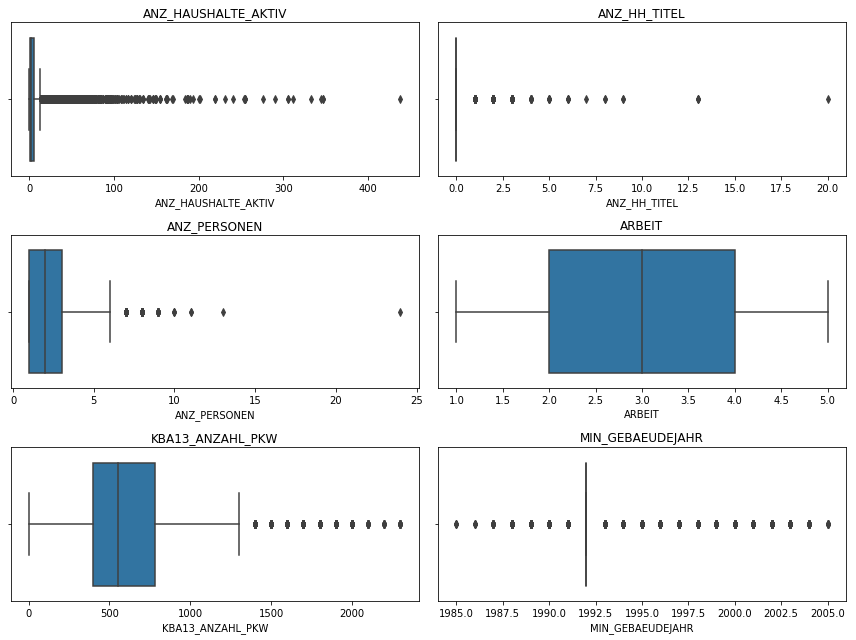

In [38]:
numeric = list(filter(lambda x:x in train.columns.tolist(),numeric_features))
nr_cols = 2
nr_rows = len(numeric)//nr_cols
li_cat_feats = numeric
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*6,nr_rows*3))
for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], data=train, hue='RESPONSE', ax = axs[r][c]).set_title(li_cat_feats[i])
plt.tight_layout()
plt.show()

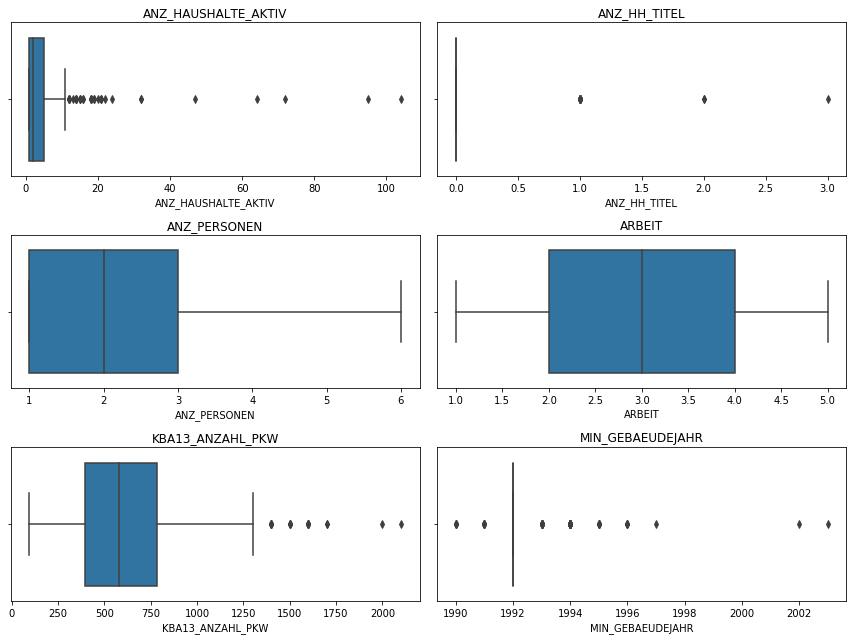

In [39]:
numeric = list(filter(lambda x:x in train.columns.tolist(),numeric_features))
nr_cols = 2
nr_rows = len(numeric)//nr_cols
li_cat_feats = numeric
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*6,nr_rows*3))
for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], data=train[train.RESPONSE==1], ax = axs[r][c]).set_title(li_cat_feats[i])
plt.tight_layout()
plt.show()

#### Categorical

In [40]:
columns_categorical=data_types[data_types['Feature_Type']=='Category']['Attribute'].tolist()+['GENERATION_DECADE',
                                                                      'Type', 'MOVEMENT','Wealth',
                                                                      'LifeStage']

In [41]:
categorical_features = list(filter(lambda x:x in train.columns.tolist(),columns_categorical))
nr_cols = 2
nr_rows = len(categorical_features)//nr_cols
li_cat_feats = categorical_features
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*7,nr_rows*5))
for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.countplot(x=li_cat_feats[i],hue='RESPONSE', data=train, ax = axs[r][c])
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

### ID

In [42]:
train.set_index('LNR',inplace=True)

In [43]:
train.head()

,AKT_DAT_KL,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ARBEIT,BALLRAUM,CAMEO_DEU_2015,CAMEO_DEUG_2015,CJT_GESAMTTYP,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,CJT_TYP_4,CJT_TYP_5,CJT_TYP_6,D19_BANKEN_ONLINE_QUOTE_12,D19_BUCH_CD,D19_GESAMT_DATUM,D19_GESAMT_ONLINE_QUOTE_12,D19_KONSUMTYP,D19_KONSUMTYP_MAX,D19_LETZTER_KAUF_BRANCHE,D19_SOZIALES,D19_TELKO_ONLINE_QUOTE_12,D19_VERSI_DATUM,D19_VERSI_OFFLINE_DATUM,D19_VERSI_ONLINE_DATUM,D19_VERSI_ONLINE_QUOTE_12,EWDICHTE,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_UNAUFFAELLIGER,FINANZ_VORSORGER,FINANZTYP,FIRMENDICHTE,GEBAEUDETYP_RASTER,GEMEINDETYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,HH_DELTA_FLAG,HH_EINKOMMEN_SCORE,INNENSTADT,KBA05_ALTER1,KBA05_ALTER2,KBA05_ALTER3,KBA05_ALTER4,KBA05_ANHANG,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_AUTOQUOT,KBA05_CCM1,KBA05_CCM2,KBA05_CCM3,KBA05_CCM4,KBA05_DIESEL,KBA05_FRAU,KBA05_GBZ,KBA05_HERST1,KBA05_HERST2,KBA05_HERST3,KBA05_HERST4,KBA05_HERST5,KBA05_HERSTTEMP,KBA05_KRSAQUOT,KBA05_KRSHERST1,KBA05_KRSHERST2,KBA05_KRSHERST3,KBA05_KRSKLEIN,KBA05_KRSOBER,KBA05_KRSVAN,KBA05_KRSZUL,KBA05_KW1,KBA05_KW2,KBA05_KW3,KBA05_MAXAH,KBA05_MAXBJ,KBA05_MAXHERST,KBA05_MAXSEG,KBA05_MAXVORB,KBA05_MOD1,KBA05_MOD2,KBA05_MOD3,KBA05_MOD4,KBA05_MOD8,KBA05_MODTEMP,KBA05_MOTOR,KBA05_MOTRAD,KBA05_SEG1,KBA05_SEG10,KBA05_SEG2,KBA05_SEG3,KBA05_SEG4,KBA05_SEG5,KBA05_SEG6,KBA05_SEG7,KBA05_SEG8,KBA05_SEG9,KBA05_VORB0,KBA05_VORB1,KBA05_VORB2,KBA05_ZUL1,KBA05_ZUL2,KBA05_ZUL3,KBA05_ZUL4,KBA13_ALTERHALTER_30,KBA13_ALTERHALTER_45,KBA13_ALTERHALTER_60,KBA13_ALTERHALTER_61,KBA13_ANTG2,KBA13_ANTG4,KBA13_ANZAHL_PKW,KBA13_AUDI,KBA13_AUTOQUOTE,KBA13_BJ_1999,KBA13_BJ_2000,KBA13_BJ_2004,KBA13_BJ_2006,KBA13_BJ_2008,KBA13_BJ_2009,KBA13_BMW,KBA13_CCM_0_1400,KBA13_CCM_1000,KBA13_CCM_1200,KBA13_CCM_1400,KBA13_CCM_1401_2500,KBA13_CCM_1500,KBA13_CCM_1600,KBA13_CCM_1800,KBA13_CCM_2000,KBA13_CCM_2500,KBA13_CCM_2501,KBA13_CCM_3000,KBA13_CCM_3001,KBA13_FAB_ASIEN,KBA13_FIAT,KBA13_FORD,KBA13_HALTER_20,KBA13_HALTER_25,KBA13_HALTER_30,KBA13_HALTER_35,KBA13_HALTER_40,KBA13_HALTER_45,KBA13_HALTER_50,KBA13_HALTER_55,KBA13_HALTER_60,KBA13_HALTER_65,KBA13_HERST_ASIEN,KBA13_HERST_AUDI_VW,KBA13_HERST_BMW_BENZ,KBA13_HERST_EUROPA,KBA13_HERST_FORD_OPEL,KBA13_HERST_SONST,KBA13_KMH_0_140,KBA13_KMH_110,KBA13_KMH_140,KBA13_KMH_140_210,KBA13_KMH_180,KBA13_KMH_210,KBA13_KMH_211,KBA13_KMH_251,KBA13_KRSAQUOT,KBA13_KRSHERST_AUDI_VW,KBA13_KRSHERST_BMW_BENZ,KBA13_KRSHERST_FORD_OPEL,KBA13_KRSSEG_KLEIN,KBA13_KRSSEG_OBER,KBA13_KRSSEG_VAN,KBA13_KRSZUL_NEU,KBA13_KW_0_60,KBA13_KW_110,KBA13_KW_120,KBA13_KW_121,KBA13_KW_30,KBA13_KW_40,KBA13_KW_50,KBA13_KW_60,KBA13_KW_61_120,KBA13_KW_70,KBA13_KW_80,KBA13_KW_90,KBA13_MAZDA,KBA13_MERCEDES,KBA13_MOTOR,KBA13_NISSAN,KBA13_OPEL,KBA13_PEUGEOT,KBA13_RENAULT,KBA13_SEG_GELAENDEWAGEN,KBA13_SEG_GROSSRAUMVANS,KBA13_SEG_KLEINST,KBA13_SEG_KLEINWAGEN,KBA13_SEG_KOMPAKTKLASSE,KBA13_SEG_MINIVANS,KBA13_SEG_MINIWAGEN,KBA13_SEG_MITTELKLASSE,KBA13_SEG_OBEREMITTELKLASSE,KBA13_SEG_OBERKLASSE,KBA13_SEG_SONSTIGE,KBA13_SEG_SPORTWAGEN,KBA13_SEG_UTILITIES,KBA13_SEG_VAN,KBA13_SEG_WOHNMOBILE,KBA13_SITZE_4,KBA13_SITZE_5,KBA13_SITZE_6,KBA13_TOYOTA,KBA13_VORB_0,KBA13_VORB_1,KBA13_VORB_1_2,KBA13_VORB_2,KBA13_VORB_3,KBA13_VW,KKK,KOMBIALTER,KONSUMNAEHE,KONSUMZELLE,LP_STATUS_FEIN,LP_STATUS_GROB,MIN_GEBAEUDEJAHR,MOBI_RASTER,MOBI_REGIO,NATIONALITAET_KZ,ONLINE_AFFINITAET,ORTSGR_KLS9,OST_WEST_KZ,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_GBZ,PLZ8_HHZ,REGIOTYP,RELAT_AB,RETOURTYP_BK_S,RT_KEIN_ANREIZ,RT_SCHNAEPPCHEN,RT_UEBERGROESSE,SEMIO_DOM,SEMIO_ERL,SEMIO_FAM,SEMIO_KAEM,SEMIO_KRIT,SEMIO_KULT,SEMIO_LUST,SEMIO_MAT,SEMIO_PFLICHT,SEMIO_RAT,SEMIO_REL,SEMIO_SOZ,SEMIO_TRADV,SEMIO_VERT,SHOPPER_TYP,STRUKTURTYP,UMFELD_ALT,UMFELD_JUNG,UNGLEICHENN_FLAG,VERDICHTUNGSRAUM,VERS_TYP,VHA,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,RESPONSE,ANREDE_KZ,ALTERSKATEGORIE_GROB,GENERATION_DECADE,Type,MOVEMENT,Wealth,LifeS

In [44]:
train.shape

(24518, 284)

# Supervised Learning Model

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [46]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import roc_auc_score,recall_score,precision_score,f1_score,confusion_matrix,accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from imblearn.pipeline import Pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [47]:
from utils import plot_confusion_matrix

## Feature Selection

In [48]:
train.head()

,AKT_DAT_KL,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,ANZ_KINDER,ANZ_PERSONEN,ARBEIT,BALLRAUM,CAMEO_DEU_2015,CAMEO_DEUG_2015,CJT_GESAMTTYP,CJT_KATALOGNUTZER,CJT_TYP_1,CJT_TYP_2,CJT_TYP_3,CJT_TYP_4,CJT_TYP_5,CJT_TYP_6,D19_BANKEN_ONLINE_QUOTE_12,D19_BUCH_CD,D19_GESAMT_DATUM,D19_GESAMT_ONLINE_QUOTE_12,D19_KONSUMTYP,D19_KONSUMTYP_MAX,D19_LETZTER_KAUF_BRANCHE,D19_SOZIALES,D19_TELKO_ONLINE_QUOTE_12,D19_VERSI_DATUM,D19_VERSI_OFFLINE_DATUM,D19_VERSI_ONLINE_DATUM,D19_VERSI_ONLINE_QUOTE_12,EWDICHTE,FINANZ_ANLEGER,FINANZ_HAUSBAUER,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_UNAUFFAELLIGER,FINANZ_VORSORGER,FINANZTYP,FIRMENDICHTE,GEBAEUDETYP_RASTER,GEMEINDETYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,HH_DELTA_FLAG,HH_EINKOMMEN_SCORE,INNENSTADT,KBA05_ALTER1,KBA05_ALTER2,KBA05_ALTER3,KBA05_ALTER4,KBA05_ANHANG,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_AUTOQUOT,KBA05_CCM1,KBA05_CCM2,KBA05_CCM3,KBA05_CCM4,KBA05_DIESEL,KBA05_FRAU,KBA05_GBZ,KBA05_HERST1,KBA05_HERST2,KBA05_HERST3,KBA05_HERST4,KBA05_HERST5,KBA05_HERSTTEMP,KBA05_KRSAQUOT,KBA05_KRSHERST1,KBA05_KRSHERST2,KBA05_KRSHERST3,KBA05_KRSKLEIN,KBA05_KRSOBER,KBA05_KRSVAN,KBA05_KRSZUL,KBA05_KW1,KBA05_KW2,KBA05_KW3,KBA05_MAXAH,KBA05_MAXBJ,KBA05_MAXHERST,KBA05_MAXSEG,KBA05_MAXVORB,KBA05_MOD1,KBA05_MOD2,KBA05_MOD3,KBA05_MOD4,KBA05_MOD8,KBA05_MODTEMP,KBA05_MOTOR,KBA05_MOTRAD,KBA05_SEG1,KBA05_SEG10,KBA05_SEG2,KBA05_SEG3,KBA05_SEG4,KBA05_SEG5,KBA05_SEG6,KBA05_SEG7,KBA05_SEG8,KBA05_SEG9,KBA05_VORB0,KBA05_VORB1,KBA05_VORB2,KBA05_ZUL1,KBA05_ZUL2,KBA05_ZUL3,KBA05_ZUL4,KBA13_ALTERHALTER_30,KBA13_ALTERHALTER_45,KBA13_ALTERHALTER_60,KBA13_ALTERHALTER_61,KBA13_ANTG2,KBA13_ANTG4,KBA13_ANZAHL_PKW,KBA13_AUDI,KBA13_AUTOQUOTE,KBA13_BJ_1999,KBA13_BJ_2000,KBA13_BJ_2004,KBA13_BJ_2006,KBA13_BJ_2008,KBA13_BJ_2009,KBA13_BMW,KBA13_CCM_0_1400,KBA13_CCM_1000,KBA13_CCM_1200,KBA13_CCM_1400,KBA13_CCM_1401_2500,KBA13_CCM_1500,KBA13_CCM_1600,KBA13_CCM_1800,KBA13_CCM_2000,KBA13_CCM_2500,KBA13_CCM_2501,KBA13_CCM_3000,KBA13_CCM_3001,KBA13_FAB_ASIEN,KBA13_FIAT,KBA13_FORD,KBA13_HALTER_20,KBA13_HALTER_25,KBA13_HALTER_30,KBA13_HALTER_35,KBA13_HALTER_40,KBA13_HALTER_45,KBA13_HALTER_50,KBA13_HALTER_55,KBA13_HALTER_60,KBA13_HALTER_65,KBA13_HERST_ASIEN,KBA13_HERST_AUDI_VW,KBA13_HERST_BMW_BENZ,KBA13_HERST_EUROPA,KBA13_HERST_FORD_OPEL,KBA13_HERST_SONST,KBA13_KMH_0_140,KBA13_KMH_110,KBA13_KMH_140,KBA13_KMH_140_210,KBA13_KMH_180,KBA13_KMH_210,KBA13_KMH_211,KBA13_KMH_251,KBA13_KRSAQUOT,KBA13_KRSHERST_AUDI_VW,KBA13_KRSHERST_BMW_BENZ,KBA13_KRSHERST_FORD_OPEL,KBA13_KRSSEG_KLEIN,KBA13_KRSSEG_OBER,KBA13_KRSSEG_VAN,KBA13_KRSZUL_NEU,KBA13_KW_0_60,KBA13_KW_110,KBA13_KW_120,KBA13_KW_121,KBA13_KW_30,KBA13_KW_40,KBA13_KW_50,KBA13_KW_60,KBA13_KW_61_120,KBA13_KW_70,KBA13_KW_80,KBA13_KW_90,KBA13_MAZDA,KBA13_MERCEDES,KBA13_MOTOR,KBA13_NISSAN,KBA13_OPEL,KBA13_PEUGEOT,KBA13_RENAULT,KBA13_SEG_GELAENDEWAGEN,KBA13_SEG_GROSSRAUMVANS,KBA13_SEG_KLEINST,KBA13_SEG_KLEINWAGEN,KBA13_SEG_KOMPAKTKLASSE,KBA13_SEG_MINIVANS,KBA13_SEG_MINIWAGEN,KBA13_SEG_MITTELKLASSE,KBA13_SEG_OBEREMITTELKLASSE,KBA13_SEG_OBERKLASSE,KBA13_SEG_SONSTIGE,KBA13_SEG_SPORTWAGEN,KBA13_SEG_UTILITIES,KBA13_SEG_VAN,KBA13_SEG_WOHNMOBILE,KBA13_SITZE_4,KBA13_SITZE_5,KBA13_SITZE_6,KBA13_TOYOTA,KBA13_VORB_0,KBA13_VORB_1,KBA13_VORB_1_2,KBA13_VORB_2,KBA13_VORB_3,KBA13_VW,KKK,KOMBIALTER,KONSUMNAEHE,KONSUMZELLE,LP_STATUS_FEIN,LP_STATUS_GROB,MIN_GEBAEUDEJAHR,MOBI_RASTER,MOBI_REGIO,NATIONALITAET_KZ,ONLINE_AFFINITAET,ORTSGR_KLS9,OST_WEST_KZ,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_GBZ,PLZ8_HHZ,REGIOTYP,RELAT_AB,RETOURTYP_BK_S,RT_KEIN_ANREIZ,RT_SCHNAEPPCHEN,RT_UEBERGROESSE,SEMIO_DOM,SEMIO_ERL,SEMIO_FAM,SEMIO_KAEM,SEMIO_KRIT,SEMIO_KULT,SEMIO_LUST,SEMIO_MAT,SEMIO_PFLICHT,SEMIO_RAT,SEMIO_REL,SEMIO_SOZ,SEMIO_TRADV,SEMIO_VERT,SHOPPER_TYP,STRUKTURTYP,UMFELD_ALT,UMFELD_JUNG,UNGLEICHENN_FLAG,VERDICHTUNGSRAUM,VERS_TYP,VHA,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,RESPONSE,ANREDE_KZ,ALTERSKATEGORIE_GROB,GENERATION_DECADE,Type,MOVEMENT,Wealth,LifeS

In [49]:
X = train.drop('RESPONSE',axis=1)
y = train['RESPONSE']

There are many features and haerdly all of them we can use to fit our model... Therefore I will apply some feature selection techniques to reduce the number of features and select just those that present higly importance for the model. 

### ANOVA

[ANOVA](https://towardsdatascience.com/anova-for-feature-selection-in-machine-learning-d9305e228476) (Analysis of Variance) : 

The variance of a feature determines how much it is impacting the response variable. If the variance is low, it implies there is no impact of this feature on response and vice-versa.


In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif,chi2

In [51]:
from utils import Feature_Selection_k_highest_scores

In [52]:
# Feature_Selection_k_highest_scores
anova_F_value = Feature_Selection_k_highest_scores(train.select_dtypes(include=np.number),
                                                   'RESPONSE',
                                                   f_classif)
anova_F_value.sort_values(by='scores',ascending=False).head(20)

,columnas,scores
23,D19_SOZIALES,51.696174
22,D19_KONSUMTYP_MAX,44.474859
241,RT_SCHNAEPPCHEN,27.974118
21,D19_KONSUMTYP,24.732494
137,KBA13_CCM_3000,11.895631
240,RT_KEIN_ANREIZ,10.378199
136,KBA13_CCM_2501,9.885877
33,FINANZ_SPARER,9.332907
79,KBA05_KW3,8.903163
209,KBA13_SITZE_5,8.718921


I will keep the top 5 

In [53]:
anova_select = anova_F_value.sort_values(by='scores',ascending=False).head(10)['columnas'].tolist()

### Boruta

The [Boruta](https://www.datacamp.com/community/tutorials/feature-selection-R-boruta#boruta) algorithm is a wrapper built around the random forest classification algorithm. It tries to capture all the important/ interesting features  with respect to an outcome variable.

In [54]:
from boruta import BorutaPy

In [55]:
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

In [56]:
# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

In [57]:
X_boruta = X.copy()

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [59]:
X_boruta = X_boruta.apply(le.fit_transform)

In [61]:
# find all relevant features
feat_selector.fit(X_boruta.values, y.ravel());

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	283
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	283
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	283
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	283
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	283
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	283
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	283
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	274
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	274
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	274
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	5
Rejected: 	274
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	275
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	275
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	275
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	4
Rejected: 	275
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	3


Boruta found 4 important features !

In [93]:
# check ranking of features
mask = feat_selector.ranking_<2

In [94]:
X_boruta.columns[mask]

Index(['D19_KONSUMTYP', 'D19_KONSUMTYP_MAX', 'D19_SOZIALES',
       'RT_SCHNAEPPCHEN'],
      dtype='object')

In [95]:
boruta_select = X_boruta.columns[mask]

I will keep the features found by Boruta + Anova + some manually selected features based on the some iterations. 

In [96]:
columns_select= list(set(boruta_select.tolist()+anova_select+['KBA13_ANZAHL_PKW','ANZ_KINDER','GFK_URLAUBERTYP','VHA','VERDICHTUNGSRAUM']))

## OHE

In [97]:
columns_categorical_OHE=data_types[data_types['Type']=='OHE']['Attribute'].tolist()+['GENERATION_DECADE',
                                                                      'Type', 'MOVEMENT','Wealth',
                                                                      'LifeStage']

Features selected that are categorical and not ordinal will be enconde into its OneHotEncoding version.

In [98]:
categorical_features_OHE = list(filter(lambda x:x in columns_select,columns_categorical_OHE))

In [99]:
for col in categorical_features_OHE:
    if X[col].dtype==np.float:
        X[col]=X[col].astype('int')

In [75]:
#X_ohe = pd.get_dummies(X[columns_select],columns=categorical_features_OHE,drop_first=True)

## DataSet - Split

I will split the data in a 70/30 split.. I will train with 70% of the data and I will test with the rest. 

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size=0.3, random_state=42)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X[columns_select], y, test_size=0.3, random_state=42)

In [101]:
X_train.shape

(17162, 15)

In [102]:
y_train.sum()

227

In [103]:
y_test.sum()

85

## Modeling

### LogisticRegression

Pipeline for preprocessing a LogisticRegression Model. 

Numeric Features: 
    1. Impute with Median
    2. Standardize features by removing the mean and scaling to unit variance
Categorical Features: 
    1. Impute with Mode. 
    2. OneHotEncoder (dummies)

In [67]:
# preprocessing pipelines for both numeric and categorical data.
numeric_features = list(filter(lambda x:x in X_train.columns.tolist(),columns_numeric))

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = list(filter(lambda x:x in X_train.columns.tolist(),columns_categorical_OHE))

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='error',drop='first'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

Since this is a Highly unbalanced dataset, I will try [SMOTE: Synthetic Minority Over-sampling Technique](https://arxiv.org/pdf/1106.1813.pdf), which  creates new (synthetic) observations based on the observations in the minority class.

In [68]:
# Full prediction pipeline. Model : LogisticRegression
clf_pipe = make_pipeline_imb(steps=[#('preprocessor', preprocessor),
                                    #('RandomUnderSampler',RandomUnderSampler(sampling_strategy=0.2,random_state=42)),
                                    ('SMOTE', SMOTE(random_state=42)),
                                    ('model', LogisticRegression())])

In [69]:
LR_param = {'model__penalty': ['l2'],
            'model__C': [0.0001,0.001,0.1,1,10,100]}

To find the best posible LogisticRegression I will use a GridSearch to search over the  parameter values of the model keeping in mind I want the best AUC.  

To avoid overfitting I will apply a cross-validation with 3 folds. 

In [ ]:
clf = GridSearchCV(clf_pipe,param_grid=LR_param,scoring = 'roc_auc',cv=3,verbose=10,n_jobs=4)

In [71]:
clf.fit(X_train,y_train);

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   12.2s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   12.6s
[Parallel(n_jobs=4)]: Done  13 out of  18 | elapsed:   12.8s remaining:    4.9s
[Parallel(n_jobs=4)]: Done  15 out of  18 | elapsed:   13.0s remaining:    2.5s
[Parallel(n_jobs=4)]: Done  18 out of  18 | elapsed:   13.1s finished


In [72]:
print(f'Best Params   :{clf.best_params_}')
y_pred=clf.predict(X_test)
print(f'ROC AUC       :{roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])}')
print(f'Precision     :{precision_score(y_test, y_pred)}')
print(f'Recall        :{recall_score(y_test, y_pred)}')
print(f'F1            :{f1_score(y_test, y_pred)}')

Best Params   :{'model__C': 100, 'model__penalty': 'l2'}
ROC AUC       :0.7255139272047699
Precision     :0.02400282386163078
Recall        :0.8
F1            :0.04660726525017135


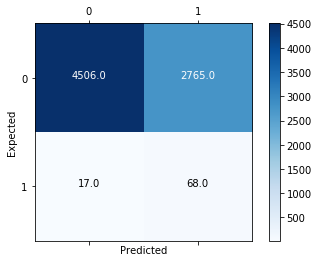

In [73]:
plot_confusion_matrix(y_test, y_pred)

Looks like the LogisticRegression is not a good options!

Lets try some NonLinear Models and more complex ones

### RandomForestClassifier

Pipeline for preprocessing a RandomForest Model. 

Numeric Features: 
    1. Impute with Median
Categorical Features: 
    1. Impute with Mode. 
    2. OneHotEncoder (dummies)

In [216]:
# preprocessing pipelines for both numeric and categorical data.
numeric = list(filter(lambda x:x in X_train.columns.tolist(),columns_numeric))

numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                      ('scaler', StandardScaler())
                                     ])

categorical_features = list(filter(lambda x:x in X_train.columns.tolist(),columns_categorical_OHE))

categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
                                          ('onehot', OneHotEncoder(handle_unknown='error',drop='first'))
                                         ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [73]:
# Full prediction pipeline. Model : RandomForest
clf_pipe = make_pipeline_imb(steps=[#('preprocessor', preprocessor),
                                    #('RandomUnderSampler',RandomUnderSampler(sampling_strategy=0.2,random_state=42)),
                                    #('SMOTE', SMOTE(random_state=42)),
                                    ('model', RandomForestClassifier(class_weight='balanced'))])

In [74]:
RFC_param = {'model__n_estimators': list(range(50,2000,200)),
             'model__max_depth' : list(range(3,20,2))+[None],
             'model__min_samples_leaf' : [1,2,4],
             'model__min_samples_split': [2,5,10],
             'model__max_features':['auto', 'sqrt']}

In this case, RandomForest has more parameters to tune. This means a lot of time computing, so In this case I will try a [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) to minimize the time.

In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. 

In [75]:
clf = RandomizedSearchCV(clf_pipe,
                         param_distributions=RFC_param,
                         scoring = 'recall',
                         cv=3,
                         verbose=10,
                         n_jobs=4,
                         n_iter=300)

In [81]:
clf.fit(X_train,y_train);

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   46.4s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  2.5min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  3.2min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  4.5min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  5.5min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  6.6min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  7.3min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  9.3min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed: 10.8min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 12.3min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed: 14.5min
[Parallel(

In [82]:
print(f'Best Params   :{clf.best_params_}')
y_pred=clf.predict(X_test)
print(f'ROC AUC       :{roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])}')
print(f'Precision     :{precision_score(y_test, y_pred)}')
print(f'Recall        :{recall_score(y_test, y_pred)}')
print(f'F1            :{f1_score(y_test, y_pred)}')

Best Params   :{'model__n_estimators': 350, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': 'auto', 'model__max_depth': 7}
ROC AUC       :0.7986586520180896
Precision     :0.03156146179401993
Recall        :0.8941176470588236
F1            :0.0609707180104292


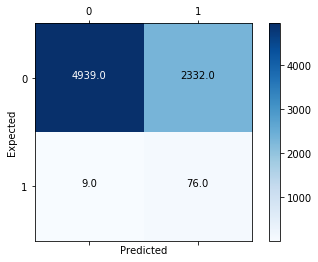

In [83]:
plot_confusion_matrix(y_test, y_pred)

This looks a lot better!. Still there is some misclassification, but the AUC looks great!

#### Feature Importance

Lets check for the feature importance in the RandomForest

In [83]:
features = clf.best_estimator_.named_steps["model"].feature_importances_

In [84]:
nombres=X_train.columns

In [91]:
df_importance = pd.DataFrame({'nombres':nombres,'features':features})
df_importance.sort_values(['features'],ascending=False).head(25)

,nombres,features
6,D19_SOZIALES,0.335319
13,D19_KONSUMTYP_MAX_2,0.129814
5,KBA13_ANZAHL_PKW,0.088761
2,VERDICHTUNGSRAUM,0.059101
16,D19_KONSUMTYP_MAX_8,0.055730
3,RT_SCHNAEPPCHEN,0.051148
4,KBA13_CCM_3000,0.042550
0,VHA,0.033115
12,D19_KONSUMTYP_9.0,0.024748
1,ANZ_KINDER,0.020475


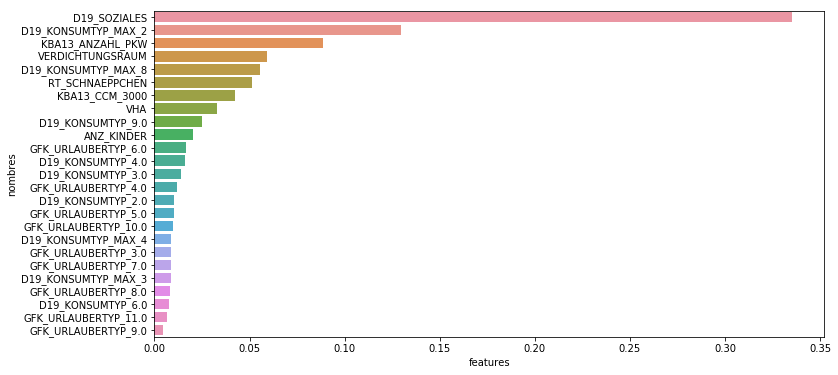

In [97]:
plt.figure(figsize=(12,6))
sns.barplot(y="nombres",
            x="features",
            data=df_importance.sort_values(['features'],ascending=False).head(25),
            );

Looks like D19_SOZIALES is higly important, this match our previous analysis with the feature selection. !

### XGBoost

Pipeline for preprocessing a RandomForest Model. 

Categorical Features: 
    1. OneHotEncoder (dummies)
    
XGBoost can handle NaN very good, so I will drop this step in the pipeline

In [104]:
# preprocessing pipelines for both numeric and categorical data.

categorical_features = list(filter(lambda x:x in X_train.columns.tolist(),columns_categorical_OHE))

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='error',drop='first'))
                                         ])
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)])

One way to used XGBoost with imbalanced dataset is to set the scale_pos_weight attribute: 

    scale_pos_weight : float
        Balancing of positive and negative weights.

In [105]:
pos_weight = int((len(y_train)-y_train.sum())/y_train.sum())

In [107]:
# Full prediction pipeline. Model : XGBoost
clf_pipe = make_pipeline_imb(steps=[('preprocessor', preprocessor),
                                    ('SMOTE', SMOTE(random_state=42)),
                                    ('model', XGBClassifier(scale_pos_weight=pos_weight))])

In [108]:
XGBoost_param = {'model__n_estimators':     [50,100,150,200,250,500],
                 'model__max_depth':        list(range(5,10,1)),
                 'model__min_child_weight': list(range(1,6,2))}

In [109]:
clf = GridSearchCV(clf_pipe,param_grid=XGBoost_param,scoring = 'roc_auc',cv=3,verbose=10,n_jobs=4)

In [ ]:
clf.fit(X_train,y_train);

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   49.3s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.7min


In [92]:
print(f'Best Params   :{clf.best_params_}')
y_pred=clf.predict(X_test)
print(f'ROC AUC       :{roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])}')
print(f'Precision     :{precision_score(y_test, y_pred)}')
print(f'Recall        :{recall_score(y_test, y_pred)}')
print(f'F1            :{f1_score(y_test, y_pred)}')

Best Params   :{'model__max_depth': 7, 'model__min_child_weight': 3, 'model__n_estimators': 50}
ROC AUC       :0.7297847209300444
Precision     :0.026490066225165563
Recall        :0.611764705882353
F1            :0.05078125


In [352]:
print(f'Best Params   :{clf.best_params_}')
y_pred=clf.predict(X_test)
print(f'ROC AUC       :{roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])}')
print(f'Precision     :{precision_score(y_test, y_pred)}')
print(f'Recall        :{recall_score(y_test, y_pred)}')
print(f'F1            :{f1_score(y_test, y_pred)}')

Best Params   :{'model__max_depth': 5, 'model__min_child_weight': 1, 'model__n_estimators': 50}
ROC AUC       :0.7727305087899553
Precision     :0.03287427809862283
Recall        :0.8705882352941177
F1            :0.06335616438356163


In [147]:
print(f'Best Params   :{clf.best_params_}')
y_pred=clf.predict(X_test)
print(f'ROC AUC       :{roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])}')
print(f'Precision     :{precision_score(y_test, y_pred)}')
print(f'Recall        :{recall_score(y_test, y_pred)}')
print(f'F1            :{f1_score(y_test, y_pred)}')

Best Params   :{'model__max_depth': 6, 'model__n_estimators': 50}
ROC AUC       :0.7843463557889117
Precision     :0.033720287451630734
Recall        :0.7176470588235294
F1            :0.06441393875395987


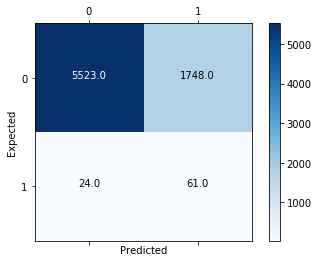

In [148]:
plot_confusion_matrix(y_test, y_pred)

Now I will try to fit model with all the data!

In [93]:
clf.best_params_

{'model__max_depth': 6,
 'model__min_child_weight': 1,
 'model__n_estimators': 50}

In [91]:
best_clf = GridSearchCV(clf_pipe,param_grid=clf.best_params_,scoring = 'roc_auc',cv=3,verbose=10,n_jobs=4)

In [92]:
best_clf.fit(X_ohe, y);

In [403]:
clf.best_score_

0.75459907197004

#### Feature Importance

In [94]:
features = clf.best_estimator_.named_steps["model"].feature_importances_

In [95]:
nombres=X_train.columns

In [96]:
df_importance = pd.DataFrame({'nombres':nombres,'features':features})
#df_importance.set_index('nombres', inplace=True)
df_importance.sort_values(['features'],ascending=False).head(25)

,nombres,features
14,D19_SOZIALES,0.009903
271,CAMEO_DEU_2015_6B,0.009870
73,KBA05_MODTEMP,0.009225
36,KBA05_ANTG2,0.009023
387,GFK_URLAUBERTYP_11.0,0.008679
141,KBA13_KMH_0_140,0.008670
296,CJT_TYP_1_3.0,0.008627
291,CJT_GESAMTTYP_3.0,0.008045
213,PLZ8_BAUMAX,0.007974
261,CAMEO_DEU_2015_4C,0.007166


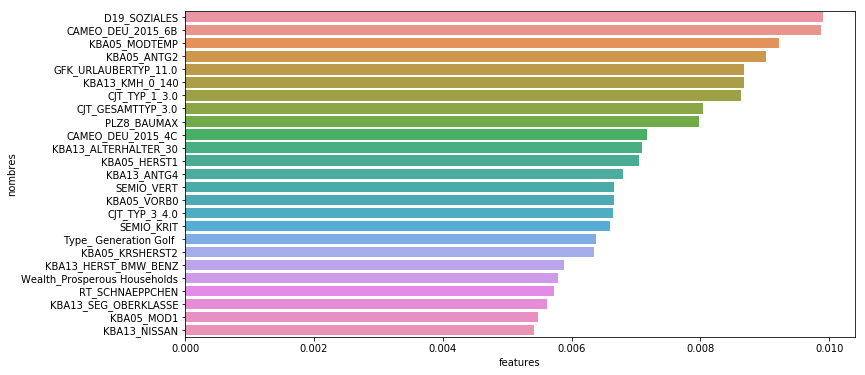

In [97]:
plt.figure(figsize=(12,6))
sns.barplot(y="nombres",
            x="features",
            data=df_importance.sort_values(['features'],ascending=False).head(25),
            );

Looks like D19_SOZIALES is higly important, this match our previous analysis with the feature selection. !

### CATBoost

[CatBoost](https://github.com/catboost) is a fast, scalable, high performance gradient boosting on decision trees library. It might be a good idea to try it. 

Advantages: Handling Categorical features automatically

 According to documentation . CatBoost provides great results with default parameters. 
 
 I will not try any tunning with this model.

In [147]:
from catboost import CatBoostClassifier, Pool, cv

Some additional preprocessing steps to use catboost according to the library. 

Non-float selected features must be string or int.  

In [160]:
X['D19_KONSUMTYP']=X['D19_KONSUMTYP'].astype('int')
X['D19_KONSUMTYP']=X['D19_KONSUMTYP'].astype('object')
X['D19_KONSUMTYP_MAX']=X['D19_KONSUMTYP_MAX'].astype('int')
X['D19_KONSUMTYP_MAX']=X['D19_KONSUMTYP_MAX'].astype('object')
X['GFK_URLAUBERTYP']=X['GFK_URLAUBERTYP'].astype('int')
X['GFK_URLAUBERTYP']=X['GFK_URLAUBERTYP'].astype('object')

In [161]:
xtrain,xtest,ytrain,ytest = train_test_split(X[columns_select],y,train_size=.3,random_state=42)

In [162]:
model = CatBoostClassifier(eval_metric='AUC',use_best_model=True,random_seed=42)

In [163]:
categorical_features = list(filter(lambda x:x in xtrain.columns.tolist(),categorical_features_OHE))

In [164]:
categorical_features

['D19_KONSUMTYP', 'D19_KONSUMTYP_MAX', 'GFK_URLAUBERTYP']

In [165]:
categorical_features_indices = np.where(X[columns_select].dtypes != np.float)[0]

In [166]:
X[columns_select].dtypes

VHA                  float64
ANZ_KINDER           float64
GFK_URLAUBERTYP       object
VERDICHTUNGSRAUM     float64
RT_SCHNAEPPCHEN      float64
KBA13_CCM_3000       float64
D19_KONSUMTYP_MAX     object
CAMEO_DEU_2015        object
KBA13_ANZAHL_PKW     float64
D19_SOZIALES         float64
D19_KONSUMTYP         object
dtype: object

In [167]:
categorical_features_indices

array([ 2,  6,  7, 10], dtype=int64)

In [168]:
model.fit(
    xtrain, ytrain,
    cat_features=categorical_features_indices,
    eval_set=(xtest, ytest),
    plot=True,
    #verbose=True
)
print('Model is fitted: ' + str(model.is_fitted()))
print('Model params:')
print(model.get_params())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.096215
0:	test: 0.5188310	best: 0.5188310 (0)	total: 28.6ms	remaining: 28.6s
1:	test: 0.5275089	best: 0.5275089 (1)	total: 57.4ms	remaining: 28.6s
2:	test: 0.5294264	best: 0.5294264 (2)	total: 78.2ms	remaining: 26s
3:	test: 0.5295076	best: 0.5295076 (3)	total: 87ms	remaining: 21.7s
4:	test: 0.5217629	best: 0.5295076 (3)	total: 94.4ms	remaining: 18.8s
5:	test: 0.6586193	best: 0.6586193 (5)	total: 114ms	remaining: 18.9s
6:	test: 0.6535587	best: 0.6586193 (5)	total: 134ms	remaining: 19s
7:	test: 0.6535587	best: 0.6586193 (5)	total: 147ms	remaining: 18.2s
8:	test: 0.6731925	best: 0.6731925 (8)	total: 159ms	remaining: 17.5s
9:	test: 0.6731925	best: 0.6731925 (8)	total: 163ms	remaining: 16.1s
10:	test: 0.7392436	best: 0.7392436 (10)	total: 188ms	remaining: 16.9s
11:	test: 0.7339004	best: 0.7392436 (10)	total: 195ms	remaining: 16.1s
12:	test: 0.7529437	best: 0.7529437 (12)	total: 218ms	remaining: 16.6s
13:	test: 0.7488006	best: 0.7529437 (12)	total: 234ms	remaining: 16.

124:	test: 0.7584092	best: 0.7620935 (28)	total: 2.1s	remaining: 14.7s
125:	test: 0.7583604	best: 0.7620935 (28)	total: 2.13s	remaining: 14.8s
126:	test: 0.7586680	best: 0.7620935 (28)	total: 2.14s	remaining: 14.7s
127:	test: 0.7587250	best: 0.7620935 (28)	total: 2.17s	remaining: 14.8s
128:	test: 0.7586942	best: 0.7620935 (28)	total: 2.19s	remaining: 14.8s
129:	test: 0.7584863	best: 0.7620935 (28)	total: 2.21s	remaining: 14.8s
130:	test: 0.7584904	best: 0.7620935 (28)	total: 2.22s	remaining: 14.8s
131:	test: 0.7584361	best: 0.7620935 (28)	total: 2.24s	remaining: 14.7s
132:	test: 0.7584452	best: 0.7620935 (28)	total: 2.25s	remaining: 14.7s
133:	test: 0.7587115	best: 0.7620935 (28)	total: 2.27s	remaining: 14.7s
134:	test: 0.7585911	best: 0.7620935 (28)	total: 2.29s	remaining: 14.7s
135:	test: 0.7579773	best: 0.7620935 (28)	total: 2.32s	remaining: 14.7s
136:	test: 0.7579713	best: 0.7620935 (28)	total: 2.34s	remaining: 14.7s
137:	test: 0.7580077	best: 0.7620935 (28)	total: 2.35s	remaining:

244:	test: 0.7407481	best: 0.7620935 (28)	total: 4.56s	remaining: 14.1s
245:	test: 0.7406193	best: 0.7620935 (28)	total: 4.58s	remaining: 14s
246:	test: 0.7406836	best: 0.7620935 (28)	total: 4.6s	remaining: 14s
247:	test: 0.7407740	best: 0.7620935 (28)	total: 4.62s	remaining: 14s
248:	test: 0.7404575	best: 0.7620935 (28)	total: 4.64s	remaining: 14s
249:	test: 0.7404600	best: 0.7620935 (28)	total: 4.67s	remaining: 14s
250:	test: 0.7403905	best: 0.7620935 (28)	total: 4.68s	remaining: 14s
251:	test: 0.7405179	best: 0.7620935 (28)	total: 4.7s	remaining: 14s
252:	test: 0.7406601	best: 0.7620935 (28)	total: 4.72s	remaining: 13.9s
253:	test: 0.7408109	best: 0.7620935 (28)	total: 4.74s	remaining: 13.9s
254:	test: 0.7409298	best: 0.7620935 (28)	total: 4.77s	remaining: 13.9s
255:	test: 0.7409256	best: 0.7620935 (28)	total: 4.79s	remaining: 13.9s
256:	test: 0.7408614	best: 0.7620935 (28)	total: 4.8s	remaining: 13.9s
257:	test: 0.7403676	best: 0.7620935 (28)	total: 4.82s	remaining: 13.9s
258:	test

368:	test: 0.7294771	best: 0.7620935 (28)	total: 6.96s	remaining: 11.9s
369:	test: 0.7278799	best: 0.7620935 (28)	total: 6.98s	remaining: 11.9s
370:	test: 0.7277569	best: 0.7620935 (28)	total: 6.99s	remaining: 11.8s
371:	test: 0.7273980	best: 0.7620935 (28)	total: 7.01s	remaining: 11.8s
372:	test: 0.7274294	best: 0.7620935 (28)	total: 7.02s	remaining: 11.8s
373:	test: 0.7266423	best: 0.7620935 (28)	total: 7.04s	remaining: 11.8s
374:	test: 0.7266853	best: 0.7620935 (28)	total: 7.05s	remaining: 11.8s
375:	test: 0.7267520	best: 0.7620935 (28)	total: 7.07s	remaining: 11.7s
376:	test: 0.7267867	best: 0.7620935 (28)	total: 7.08s	remaining: 11.7s
377:	test: 0.7266130	best: 0.7620935 (28)	total: 7.1s	remaining: 11.7s
378:	test: 0.7265802	best: 0.7620935 (28)	total: 7.11s	remaining: 11.6s
379:	test: 0.7264923	best: 0.7620935 (28)	total: 7.12s	remaining: 11.6s
380:	test: 0.7265885	best: 0.7620935 (28)	total: 7.13s	remaining: 11.6s
381:	test: 0.7266481	best: 0.7620935 (28)	total: 7.14s	remaining:

491:	test: 0.7200863	best: 0.7620935 (28)	total: 9.25s	remaining: 9.55s
492:	test: 0.7203072	best: 0.7620935 (28)	total: 9.28s	remaining: 9.54s
493:	test: 0.7206755	best: 0.7620935 (28)	total: 9.29s	remaining: 9.52s
494:	test: 0.7206170	best: 0.7620935 (28)	total: 9.32s	remaining: 9.51s
495:	test: 0.7206791	best: 0.7620935 (28)	total: 9.33s	remaining: 9.48s
496:	test: 0.7205771	best: 0.7620935 (28)	total: 9.35s	remaining: 9.47s
497:	test: 0.7203471	best: 0.7620935 (28)	total: 9.38s	remaining: 9.45s
498:	test: 0.7203342	best: 0.7620935 (28)	total: 9.4s	remaining: 9.43s
499:	test: 0.7203480	best: 0.7620935 (28)	total: 9.41s	remaining: 9.41s
500:	test: 0.7200717	best: 0.7620935 (28)	total: 9.44s	remaining: 9.4s
501:	test: 0.7197378	best: 0.7620935 (28)	total: 9.46s	remaining: 9.38s
502:	test: 0.7197753	best: 0.7620935 (28)	total: 9.48s	remaining: 9.36s
503:	test: 0.7194547	best: 0.7620935 (28)	total: 9.5s	remaining: 9.35s
504:	test: 0.7195297	best: 0.7620935 (28)	total: 9.52s	remaining: 9

615:	test: 0.7099079	best: 0.7620935 (28)	total: 11.7s	remaining: 7.29s
616:	test: 0.7098632	best: 0.7620935 (28)	total: 11.7s	remaining: 7.26s
617:	test: 0.7097394	best: 0.7620935 (28)	total: 11.7s	remaining: 7.24s
618:	test: 0.7097604	best: 0.7620935 (28)	total: 11.7s	remaining: 7.22s
619:	test: 0.7097838	best: 0.7620935 (28)	total: 11.8s	remaining: 7.21s
620:	test: 0.7100548	best: 0.7620935 (28)	total: 11.8s	remaining: 7.18s
621:	test: 0.7099617	best: 0.7620935 (28)	total: 11.8s	remaining: 7.16s
622:	test: 0.7100138	best: 0.7620935 (28)	total: 11.8s	remaining: 7.14s
623:	test: 0.7097816	best: 0.7620935 (28)	total: 11.8s	remaining: 7.12s
624:	test: 0.7096810	best: 0.7620935 (28)	total: 11.8s	remaining: 7.1s
625:	test: 0.7098067	best: 0.7620935 (28)	total: 11.9s	remaining: 7.09s
626:	test: 0.7098018	best: 0.7620935 (28)	total: 11.9s	remaining: 7.09s
627:	test: 0.7097254	best: 0.7620935 (28)	total: 11.9s	remaining: 7.07s
628:	test: 0.7097604	best: 0.7620935 (28)	total: 12s	remaining: 7

735:	test: 0.7071365	best: 0.7620935 (28)	total: 14.1s	remaining: 5.06s
736:	test: 0.7071724	best: 0.7620935 (28)	total: 14.1s	remaining: 5.04s
737:	test: 0.7072066	best: 0.7620935 (28)	total: 14.1s	remaining: 5.02s
738:	test: 0.7070803	best: 0.7620935 (28)	total: 14.2s	remaining: 5s
739:	test: 0.7069422	best: 0.7620935 (28)	total: 14.2s	remaining: 4.98s
740:	test: 0.7070557	best: 0.7620935 (28)	total: 14.2s	remaining: 4.96s
741:	test: 0.7069918	best: 0.7620935 (28)	total: 14.2s	remaining: 4.94s
742:	test: 0.7070364	best: 0.7620935 (28)	total: 14.2s	remaining: 4.92s
743:	test: 0.7068738	best: 0.7620935 (28)	total: 14.2s	remaining: 4.9s
744:	test: 0.7066612	best: 0.7620935 (28)	total: 14.3s	remaining: 4.88s
745:	test: 0.7066612	best: 0.7620935 (28)	total: 14.3s	remaining: 4.86s
746:	test: 0.7068021	best: 0.7620935 (28)	total: 14.3s	remaining: 4.84s
747:	test: 0.7067613	best: 0.7620935 (28)	total: 14.3s	remaining: 4.82s
748:	test: 0.7067629	best: 0.7620935 (28)	total: 14.3s	remaining: 4.

859:	test: 0.7063348	best: 0.7620935 (28)	total: 16.5s	remaining: 2.69s
860:	test: 0.7064464	best: 0.7620935 (28)	total: 16.6s	remaining: 2.67s
861:	test: 0.7064484	best: 0.7620935 (28)	total: 16.6s	remaining: 2.65s
862:	test: 0.7064988	best: 0.7620935 (28)	total: 16.6s	remaining: 2.64s
863:	test: 0.7065432	best: 0.7620935 (28)	total: 16.6s	remaining: 2.62s
864:	test: 0.7065344	best: 0.7620935 (28)	total: 16.6s	remaining: 2.6s
865:	test: 0.7065471	best: 0.7620935 (28)	total: 16.7s	remaining: 2.58s
866:	test: 0.7063384	best: 0.7620935 (28)	total: 16.7s	remaining: 2.56s
867:	test: 0.7063888	best: 0.7620935 (28)	total: 16.7s	remaining: 2.54s
868:	test: 0.7061680	best: 0.7620935 (28)	total: 16.7s	remaining: 2.52s
869:	test: 0.7059113	best: 0.7620935 (28)	total: 16.8s	remaining: 2.5s
870:	test: 0.7058870	best: 0.7620935 (28)	total: 16.8s	remaining: 2.48s
871:	test: 0.7060365	best: 0.7620935 (28)	total: 16.8s	remaining: 2.46s
872:	test: 0.7059924	best: 0.7620935 (28)	total: 16.8s	remaining: 

979:	test: 0.7042494	best: 0.7620935 (28)	total: 18.9s	remaining: 385ms
980:	test: 0.7042618	best: 0.7620935 (28)	total: 18.9s	remaining: 366ms
981:	test: 0.7043004	best: 0.7620935 (28)	total: 18.9s	remaining: 347ms
982:	test: 0.7039477	best: 0.7620935 (28)	total: 18.9s	remaining: 327ms
983:	test: 0.7039770	best: 0.7620935 (28)	total: 18.9s	remaining: 308ms
984:	test: 0.7039075	best: 0.7620935 (28)	total: 19s	remaining: 289ms
985:	test: 0.7037942	best: 0.7620935 (28)	total: 19s	remaining: 270ms
986:	test: 0.7038446	best: 0.7620935 (28)	total: 19s	remaining: 250ms
987:	test: 0.7038835	best: 0.7620935 (28)	total: 19s	remaining: 231ms
988:	test: 0.7040384	best: 0.7620935 (28)	total: 19s	remaining: 212ms
989:	test: 0.7037570	best: 0.7620935 (28)	total: 19.1s	remaining: 192ms
990:	test: 0.7037357	best: 0.7620935 (28)	total: 19.1s	remaining: 173ms
991:	test: 0.7037374	best: 0.7620935 (28)	total: 19.1s	remaining: 154ms
992:	test: 0.7036064	best: 0.7620935 (28)	total: 19.1s	remaining: 135ms
99

## Save Model

In [406]:
# save the model to disk
import pickle

In [407]:
filename = 'best_classifier.sav'
pickle.dump(clf, open(filename, 'wb'))

In [408]:
filename = 'best_classifier.sav'
pickle.dump(clf, open(filename, 'wb'))

# Quick Exploration of Feature Importance

In [170]:
mailout_train = pd.read_csv('data/Udacity_MAILOUT_052018_TRAIN.csv', sep=';')

In [171]:
df_target = mailout_train[mailout_train['RESPONSE'] == 1]
df_outside = mailout_train[mailout_train['RESPONSE'] == 0]

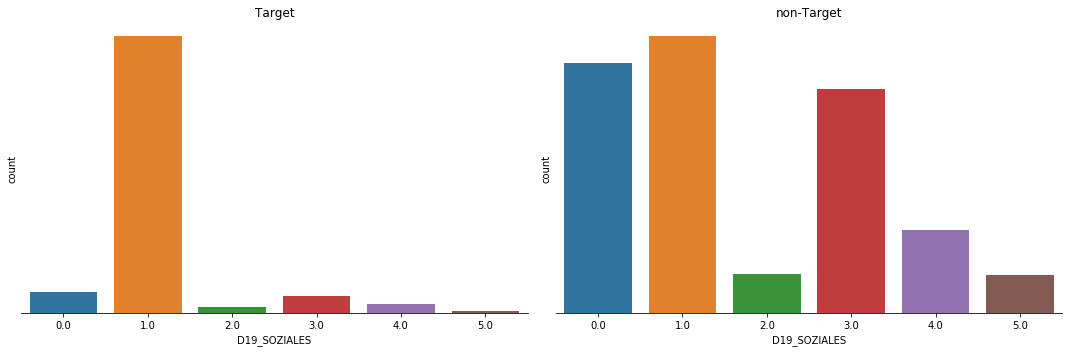

In [193]:
# Set up the matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(15, 5), )
sns.despine(left=True)

sns.countplot(x="D19_SOZIALES", data=df_target,ax=axes[0]).set_title('Target');

sns.countplot(x="D19_SOZIALES", data=df_outside,ax=axes[1]).set_title('non-Target');

plt.setp(axes, yticks=[])
plt.tight_layout()

It is clear why D19_SOZIALES is such a strong feature, people who belongs to class 1 cleary have just 1 in this category. 

# Part 3: Kaggle Competition

Now that you've created a model to predict which individuals are most likely to respond to a mailout campaign, it's time to test that model in competition through Kaggle. If you click on the link [here](http://www.kaggle.com/t/21e6d45d4c574c7fa2d868f0e8c83140), you'll be taken to the competition page where, if you have a Kaggle account, you can enter. If you're one of the top performers, you may have the chance to be contacted by a hiring manager from Arvato or Bertelsmann for an interview!

Your entry to the competition should be a CSV file with two columns. The first column should be a copy of "LNR", which acts as an ID number for each individual in the "TEST" partition. The second column, "RESPONSE", should be some measure of how likely each individual became a customer – this might not be a straightforward probability. As you should have found in Part 2, there is a large output class imbalance, where most individuals did not respond to the mailout. Thus, predicting individual classes and using accuracy does not seem to be an appropriate performance evaluation method. Instead, the competition will be using AUC to evaluate performance. The exact values of the "RESPONSE" column do not matter as much: only that the higher values try to capture as many of the actual customers as possible, early in the ROC curve sweep.

In [98]:
mailout_test = pd.read_csv('data/Udacity_MAILOUT_052018_TEST.csv', sep=';')

clean test data with the same steps

In [99]:
mailout_test = replace_NaN_data(mailout_test)
mailout_test = mix_features(mailout_test)

In [100]:
# Social_Status 1,2: low-income earners | 3,4,5: average earners | 6,7: independants | 8,9: houseowners | 10: top earners 
mailout_test.replace({'LP_STATUS_GROB' :  { 2 : 1,
                                      4 : 3,
                                      5 : 3,
                                      7 : 6,
                                      9 : 8,}}, inplace =True)

In [101]:
mailout_test.set_index('LNR',inplace=True)

In [102]:
#Default value  is  0
mailout_test['GEBAEUDETYP_5'] = 0
mailout_test['GEBAEUDETYP_5'] = mailout_test['GEBAEUDETYP_5'].astype('uint8')

In [103]:
categorical_features_OHE = list(filter(lambda x:x in columns_select,columns_categorical_OHE))

df_dummies_test = pd.get_dummies(mailout_test,columns=categorical_features_OHE)

In [114]:
y_prob=clf.predict_proba(df_dummies_test[X_train.columns])[:,1]

KeyError: "['GEMEINDETYP_12.0', 'FINANZTYP_6.0', 'LP_STATUS_FEIN_2.0', 'CAMEO_DEU_2015_6B', 'Type_ reconstruction years ', 'CJT_TYP_3_2.0', 'ZABEOTYP_2.0', 'CAMEO_DEU_2015_4B', 'D19_LETZTER_KAUF_BRANCHE_D19_TELKO_REST', 'CJT_TYP_2_3.0', 'CJT_TYP_5_5.0', 'RETOURTYP_BK_S_4.0', 'Type_ milk bar / Individualisation ', 'CAMEO_DEU_2015_9D', 'CJT_TYP_4_2.0', 'D19_LETZTER_KAUF_BRANCHE_D19_BUCH_CD', 'CAMEO_DEU_2015_9A', 'LP_STATUS_FEIN_6.0', 'ANREDE_KZ_2.0', 'CJT_TYP_6_4.0', 'CJT_TYP_1_2.0', 'KBA05_MAXHERST_5.0', 'ZABEOTYP_5.0', 'MOVEMENT_Mainstream', 'D19_LETZTER_KAUF_BRANCHE_D19_VOLLSORTIMENT', 'LP_STATUS_FEIN_5.0', 'CAMEO_DEU_2015_1C', 'LifeStage_Families With School Age Children', 'LP_STATUS_FEIN_4.0', 'CAMEO_DEU_2015_6F', 'Type_ ecological awareness ', 'D19_LETZTER_KAUF_BRANCHE_D19_ENERGIE', 'UNGLEICHENN_FLAG_1.0', 'Wealth_Less Affluent Households', 'GENERATION_DECADE_90ies ', 'D19_LETZTER_KAUF_BRANCHE_D19_KOSMETIK', 'D19_LETZTER_KAUF_BRANCHE_D19_LEBENSMITTEL', 'WOHNLAGE_2.0', 'CJT_GESAMTTYP_6.0', 'Type_ Generation Golf ', 'FINANZTYP_4.0', 'D19_LETZTER_KAUF_BRANCHE_D19_NAHRUNGSERGAENZUNG', 'CAMEO_DEU_2015_5F', 'CJT_GESAMTTYP_4.0', 'VERS_TYP_2.0', 'ZABEOTYP_3.0', 'CJT_TYP_5_3.0', 'CAMEO_DEU_2015_7D', 'RETOURTYP_BK_S_5.0', 'FINANZTYP_3.0', 'LP_STATUS_FEIN_7.0', 'Type_ economic miracle ', 'D19_LETZTER_KAUF_BRANCHE_D19_BIO_OEKO', 'D19_LETZTER_KAUF_BRANCHE_D19_RATGEBER', 'CAMEO_DEU_2015_2D', 'LP_STATUS_GROB_5.0', 'WOHNLAGE_5.0', 'LP_STATUS_GROB_2.0', 'CJT_TYP_2_5.0', 'NATIONALITAET_KZ_2.0', 'Type_ generation 68 / student protestors ', 'LifeStage_Young Couples With Children', 'GENERATION_DECADE_50ies ', 'GENERATION_DECADE_60ies ', 'CAMEO_DEU_2015_1E', 'D19_LETZTER_KAUF_BRANCHE_D19_SAMMELARTIKEL', 'CJT_GESAMTTYP_5.0', 'GFK_URLAUBERTYP_10.0', 'CAMEO_DEU_2015_9E', 'LP_STATUS_GROB_3.0', 'GFK_URLAUBERTYP_3.0', 'D19_LETZTER_KAUF_BRANCHE_D19_VERSICHERUNGEN', 'CAMEO_DEU_2015_4D', 'D19_LETZTER_KAUF_BRANCHE_D19_TECHNIK', 'CJT_TYP_3_4.0', 'CAMEO_DEU_2015_5D', 'D19_LETZTER_KAUF_BRANCHE_D19_HAUS_DEKO', 'WOHNLAGE_4.0', 'GFK_URLAUBERTYP_2.0', 'CJT_TYP_3_5.0', 'KONSUMZELLE_1.0', 'CAMEO_DEU_2015_6D', 'CAMEO_DEU_2015_2C', 'CAMEO_DEU_2015_3A', 'CJT_TYP_4_5.0', 'CJT_TYP_4_3.0', 'GFK_URLAUBERTYP_11.0', 'CAMEO_DEU_2015_6A', 'LP_STATUS_FEIN_10.0', 'GREEN_AVANTGARDE_1', 'GEBAEUDETYP_RASTER_5.0', 'CJT_TYP_2_4.0', 'GEMEINDETYP_40.0', 'GEBAEUDETYP_RASTER_2.0', 'LP_STATUS_GROB_4.0', 'GEBAEUDETYP_RASTER_4.0', 'LP_STATUS_FEIN_8.0', 'LP_STATUS_FEIN_9.0', 'Type_ opponents to the building of the Wall ', 'CAMEO_DEU_2015_9C', 'GEMEINDETYP_21.0', 'NATIONALITAET_KZ_3.0', 'D19_LETZTER_KAUF_BRANCHE_D19_UNBEKANNT', 'CAMEO_DEU_2015_7C', 'ZABEOTYP_4.0', 'D19_LETZTER_KAUF_BRANCHE_D19_HANDWERK', 'D19_LETZTER_KAUF_BRANCHE_D19_WEIN_FEINKOST', 'SHOPPER_TYP_2.0', 'CAMEO_DEU_2015_8B', 'GEMEINDETYP_30.0', 'GEMEINDETYP_50.0', 'Type_ family orientation ', 'GENERATION_DECADE_70ies ', 'CAMEO_DEU_2015_7A', 'Type_ peace movement ', 'LifeStage_Pre-Family Couples & Singles', 'LP_STATUS_FEIN_3.0', 'CAMEO_DEU_2015_6E', 'D19_LETZTER_KAUF_BRANCHE_D19_BEKLEIDUNG_REST', 'CAMEO_DEU_2015_1B', 'CAMEO_DEU_2015_3D', 'CAMEO_DEU_2015_3B', 'GFK_URLAUBERTYP_4.0', 'D19_LETZTER_KAUF_BRANCHE_D19_BILDUNG', 'WOHNLAGE_3.0', 'CAMEO_DEU_2015_4C', 'HH_DELTA_FLAG_1.0', 'CAMEO_DEU_2015_8D', 'D19_LETZTER_KAUF_BRANCHE_D19_DIGIT_SERV', 'WOHNLAGE_8.0', 'CJT_TYP_6_3.0', 'CJT_TYP_6_2.0', 'CAMEO_DEU_2015_1D', 'OST_WEST_KZ_W', 'D19_LETZTER_KAUF_BRANCHE_D19_BANKEN_REST', 'CJT_GESAMTTYP_2.0', 'LifeStage_Older Families & Mature Couples', 'D19_LETZTER_KAUF_BRANCHE_D19_VERSAND_REST', 'Wealth_Wealthy Households', 'D19_LETZTER_KAUF_BRANCHE_D19_DROGERIEARTIKEL', 'D19_LETZTER_KAUF_BRANCHE_D19_BEKLEIDUNG_GEH', 'CJT_TYP_6_5.0', 'CJT_TYP_5_2.0', 'GENERATION_DECADE_80ies ', 'CAMEO_DEU_2015_2A', 'GFK_URLAUBERTYP_6.0', 'GEMEINDETYP_22.0', 'GFK_URLAUBERTYP_9.0', 'STRUKTURTYP_3.0', 'RETOURTYP_BK_S_3.0', 'ZABEOTYP_6.0', 'FINANZTYP_5.0', 'D19_LETZTER_KAUF_BRANCHE_D19_SCHUHE', 'CJT_TYP_2_2.0', 'CAMEO_DEU_2015_7E', 'FINANZTYP_2.0', 'HEALTH_TYP_2.0', 'GFK_URLAUBERTYP_5.0', 'Type_ war years ', 'CJT_TYP_3_3.0', 'D19_LETZTER_KAUF_BRANCHE_D19_FREIZEIT', 'D19_LETZTER_KAUF_BRANCHE_D19_KINDERARTIKEL', 'CJT_TYP_1_5.0', 'CAMEO_DEU_2015_4A', 'CAMEO_DEU_2015_3C', 'STRUKTURTYP_2.0', 'GFK_URLAUBERTYP_7.0', 'CAMEO_DEU_2015_5E', 'SHOPPER_TYP_1.0', 'RETOURTYP_BK_S_2.0', 'CAMEO_DEU_2015_5B', 'D19_LETZTER_KAUF_BRANCHE_D19_GARTEN', 'D19_LETZTER_KAUF_BRANCHE_D19_TELKO_MOBILE', 'CAMEO_DEU_2015_2B', 'SHOPPER_TYP_3.0', 'CJT_TYP_1_4.0', 'CAMEO_DEU_2015_4E', 'KBA05_MAXHERST_2.0', 'D19_LETZTER_KAUF_BRANCHE_D19_SONSTIGE', 'D19_LETZTER_KAUF_BRANCHE_D19_TIERARTIKEL', 'GFK_URLAUBERTYP_12.0', 'D19_LETZTER_KAUF_BRANCHE_D19_BANKEN_LOKAL', 'CJT_GESAMTTYP_3.0', 'WOHNLAGE_7.0', 'Type_ Swords into ploughshares ', 'D19_LETZTER_KAUF_BRANCHE_D19_LOTTO', 'HEALTH_TYP_3.0', 'D19_LETZTER_KAUF_BRANCHE_D19_BANKEN_GROSS', 'CJT_TYP_5_4.0', 'Wealth_Prosperous Households', 'CAMEO_DEU_2015_8A', 'CJT_TYP_1_3.0', 'GFK_URLAUBERTYP_8.0', 'CJT_TYP_4_4.0', 'CAMEO_DEU_2015_8C', 'KBA05_MAXHERST_3.0', 'Wealth_Poorer Households', 'CAMEO_DEU_2015_7B', 'CAMEO_DEU_2015_6C', 'KBA05_MAXHERST_4.0', 'GEBAEUDETYP_RASTER_3.0', 'CAMEO_DEU_2015_5C', 'LifeStage_Older Families &  Mature Couples', 'Type_ digital media kids ', 'CAMEO_DEU_2015_9B', 'D19_LETZTER_KAUF_BRANCHE_D19_REISEN', 'CAMEO_DEU_2015_5A'] not in index"

In [105]:
df_dummies_test.columns = [col.split('.')[0] for col in df_dummies_test.columns ]

In [113]:
rename = {}
for i in range(0,46):
    rename['KBA05_MAXHERST_'+str(i)]='KBA05_MAXHERST_'+str(i)+'.0'
    
df_dummies_test.rename(columns=rename,inplace=True)

In [423]:
mailout_test['RESPONSE'] = y_prob

In [424]:
mailout_test.reset_index()[['LNR','RESPONSE']].to_csv('data/submission_10.csv',index=False)

## RESULTS

not so bad!

![sumbit](img/kaggle_2.PNG)

# Considearitons

There are a lot of things I still one to try to improve the project.

    1. Add more features, maybe try Featuretools to  build more interesting features.
    2. Algorithm LGBM looks promising. 
    3. Bayesin optimization
    4. Maybe apply unsupervised and supervied to boost performance


The final model is nearly 0.8!.  I will try to push that score as far as I can. 

# References

1. [Average Advertisin Costs](https://www.lyfemarketing.com/blog/average-advertising-costs/)
2. [Silhoutte Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)
3. [Elbow Method Heuristic](https://www.oreilly.com/library/view/statistics-for-machine/9781788295758/c71ea970-0f3c-4973-8d3a-b09a7a6553c1.xhtml)
4. [ROC Curve AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)
5. [K-MEANS](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)